# **Business Understanding**

## **Overview**

Smallholder farmers across Africa often face price volatility and post-harvest losses of up to 40%. agriBORA is a startup aiming to help smallholder farmers in Kenya by offering certified warehouses where farmers can safely store their produce and receive digital warehouse certificates, enabling access to loans and the option of delayed selling. This provides flexibility for farmers in deciding the optimal time to sell their produce for maximum returns, and reduces storage losses.

Using historical prices of dry maize in Kenya, the task is to develop a machine learning solution to predict average weekly prices of maize in the counties of Kiambu, Kirinyaga, Mombasa, Nairobi and Uasin-Gishu. At each prediction step, your model should generate forecasts for two consecutive weeks. The forecasting period spans six consecutive weeks, frMom November 17, 2025 to January 10, 2026.



## **Problem Statement**

Maize prices in Kenya are volatile due to factors such as:

- Weather conditions i.e rainfall and drought
- Supply and demand dynamics
- Seasonal variations and harvest cycles
- Market shocks and policy changes

The challenge is to forecast short-term maize prices accurately using historical data from agriBORA and supplemental features from KAMIS, while accounting for trends, seasonality, and external factors. 

Accurate forecasts will help farmers time their sales effectively, increase earnings, and strengthen agriBORA’s integrated storage, credit, and market intelligence service to East African farmers.

## **Objectives**

### **Main Objective**

To predict average weekly sales of maize in the five target counties

### **Secondary Objectives**

- Incorporate external market data i.e KAMIS to improve prediction accuracy
- Explore potential correlations with seasonality, supply volumes, and other market indicators
- Build a reproducible forecasting pipeline that can be extended to other counties or commodities

## **Metrics of success**

- MAE (50%): measures the average magnitude of errors between predicted and actual values.
- RMSE (50%): measures the deviation of your predictions from the actual values, but penalises large errors more heavily.




#  **Data Understanding**


### **AgriBora Dataset**

| Feature                  | Type        | Description                           |
| ------------------------ | ----------- | ------------------------------------- |
| County                   | Categorical | County of the transaction             |
| Date                     | Datetime    | Date of the transaction               |
| WholeSale                | Numeric     | Wholesale price (**target variable**) |
| Commodity_Classification | Categorical | Type of maize (white, yellow, mixed)  |
| Year_Week                | String      | Week identifier (YYYY-WW)             |
| WeekofYear               | Numeric     | Week number in the year               |



### **KAMIS Dataset**

| Feature        | Type        | Description                                 |
| -------------- | ----------- | ------------------------------------------- |
| Commodity      | Categorical | Maize type (white, yellow, mixed)           |
| Classification | Categorical | Commodity classification (wholesale/retail) |
| Grade          | Categorical | Maize grade                                 |
| Sex            | Categorical | Not relevant for maize                      |
| Market         | Categorical | Market where price recorded                 |
| Wholesale      | Numeric     | Wholesale price                             |
| Retail         | Numeric     | Retail price                                |
| Supply Volume  | Numeric     | Volume sold                                 |
| County         | Categorical | County of market                            |
| Date           | Datetime    | Date of observation                         |
| Unit           | Categorical | Price unit (e.g., Ksh per 90kg bag)         |
| Source         | Categorical | Data source                                 |
| Year           | Numeric     | Year                                        |
| Month          | Numeric     | Month                                       |
| Year-Month     | String      | YYYY-MM                                     |
| Week           | Numeric     | Week number                                 |


## **Data Exploration**

In [95]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## **AgriBora Dataset**

In [96]:
# Loading the agribora dataset

df = pd.read_csv('agribora_maize_prices.csv')
df.head()

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40
2,Kisumu,2023-10-03,44.44,Dry_White_Maize,2023-40,40
3,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40
4,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40


In [97]:
# Exploring the rows and columns of the dataset
df.shape

(808, 6)

In [98]:
#inspecting the data types and non-null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   County                    805 non-null    object 
 1   Date                      808 non-null    object 
 2   WholeSale                 806 non-null    float64
 3   Commodity_Classification  808 non-null    object 
 4   Year_Week                 808 non-null    object 
 5   WeekofYear                808 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 38.0+ KB


In [99]:
# Statistical summary of the dataset
df.describe()

,WholeSale,WeekofYear
count,806.000000,808.000000
mean,41.671117,23.925743
std,5.035920,14.408776
min,25.880000,1.000000
25%,37.780000,10.000000
50%,42.220000,24.000000
75%,45.560000,35.000000
max,52.220000,50.000000


In [100]:
# Statistical summary of categorical columns
df.describe(include='object')

,County,Date,Commodity_Classification,Year_Week
count,805,808,808,808
unique,16,229,1,91
top,Uasin-Gishu,2025-08-04,Dry_White_Maize,2025-32
freq,437,15,808,70


In [101]:
# Checking for missing values in the dataset
df.isnull().sum()

County                      3
Date                        0
WholeSale                   2
Commodity_Classification    0
Year_Week                   0
WeekofYear                  0
dtype: int64

In [102]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

162

## **KAMIS Dataset**

In [103]:
# Loading the dataset
df1 = pd.read_csv('kamis_maize_prices.csv')
df1.head()

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,Year_Week,SupplyVolume,Retail,Wholesale,Unit
0,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,2021-05-24,2021,5,2021-05,21,2021-21,2700.0,30.0,25.00,Kg
1,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
2,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
3,Dry_Maize_Mixed_Traditional,Dry_Maize,Mixed_Traditional,Baringo,Eldama_Ravine_Market,2021-05-24,2021,5,2021-05,21,2021-21,900.0,40.0,22.22,Kg
4,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg


In [104]:
# Exploring the rows and columns of the dataset
df1.shape

(21888, 15)

In [105]:
# Statistical summary of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21888 entries, 0 to 21887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Commodity_Classification  21888 non-null  object 
 1   Commodity                 21888 non-null  object 
 2   Classification            21888 non-null  object 
 3   County                    21888 non-null  object 
 4   Market                    21888 non-null  object 
 5   Date                      21888 non-null  object 
 6   Year                      21888 non-null  int64  
 7   Month                     21888 non-null  int64  
 8   Year_Month                21888 non-null  object 
 9   WeekofYear                21888 non-null  int64  
 10  Year_Week                 21888 non-null  object 
 11  SupplyVolume              17382 non-null  float64
 12  Retail                    21016 non-null  float64
 13  Wholesale                 20203 non-null  float64
 14  Unit  

In [106]:
# Statistical summary of numeric columns
df1.describe()

,Year,Month,WeekofYear,SupplyVolume,Retail,Wholesale
count,21888.000000,21888.000000,21888.000000,1.738200e+04,21016.000000,20203.000000
mean,2022.362482,6.536230,26.628609,2.658967e+04,62.201108,50.883522
std,1.088241,3.123253,13.475370,1.087851e+06,73.859895,30.933462
min,2021.000000,1.000000,1.000000,0.000000e+00,6.390000,0.020000
25%,2021.000000,4.000000,17.000000,1.625000e+03,40.000000,34.440000
50%,2022.000000,6.000000,26.000000,4.600000e+03,60.000000,50.000000
75%,2023.000000,9.000000,38.000000,1.000000e+04,75.000000,64.440000
max,2025.000000,12.000000,52.000000,1.000000e+08,5500.000000,3500.000000


In [107]:
# Statistical summary of categorical columns
df1.describe(include='object')

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year_Month,Year_Week,Unit
count,21888,21888,21888,21888,21888,21888,21888,21888,21888
unique,3,1,3,47,238,1333,50,207,1
top,Dry_White_Maize,Dry_Maize,White_Maize,Nairobi,Nakuru_Wakulima_Market,2021-05-24,2021-05,2021-21,Kg
freq,14751,21888,14751,2125,1249,1851,1909,1896,21888


In [108]:
# Checking for missing values in the dataset
df1.isnull().sum()

Commodity_Classification       0
Commodity                      0
Classification                 0
County                         0
Market                         0
Date                           0
Year                           0
Month                          0
Year_Month                     0
WeekofYear                     0
Year_Week                      0
SupplyVolume                4506
Retail                       872
Wholesale                   1685
Unit                           0
dtype: int64

In [109]:
# checking for duplicate rows in the dataset
df1.duplicated().sum()

829

# **Data Preparation**

## **Data Cleaning**

### **Cleaning the Agribora dataset**

In [110]:
# changing the column format
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [111]:
df.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear'],
      dtype='object')

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.isnull().sum()   

county                      3
date                        0
wholesale                   2
commodity_classification    0
year_week                   0
weekofyear                  0
dtype: int64

In [114]:
df.dropna(inplace=True)

In [115]:
df.isnull().sum()

county                      0
date                        0
wholesale                   0
commodity_classification    0
year_week                   0
weekofyear                  0
dtype: int64

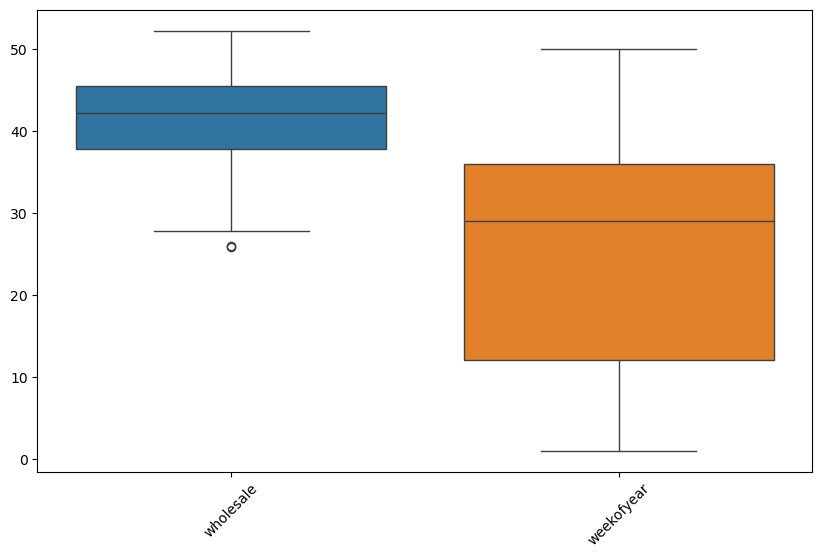

In [116]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### **Cleaning the KAMIS dataset**

In [117]:
# changing the column format
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

In [118]:
df1.columns

Index(['commodity_classification', 'commodity', 'classification', 'county',
       'market', 'date', 'year', 'month', 'year_month', 'weekofyear',
       'year_week', 'supplyvolume', 'retail', 'wholesale', 'unit'],
      dtype='object')

In [119]:
df1.duplicated().sum()  

829

In [120]:
df1.drop_duplicates(inplace=True)

In [121]:
df1.isnull().sum()

commodity_classification       0
commodity                      0
classification                 0
county                         0
market                         0
date                           0
year                           0
month                          0
year_month                     0
weekofyear                     0
year_week                      0
supplyvolume                4227
retail                       859
wholesale                   1577
unit                           0
dtype: int64

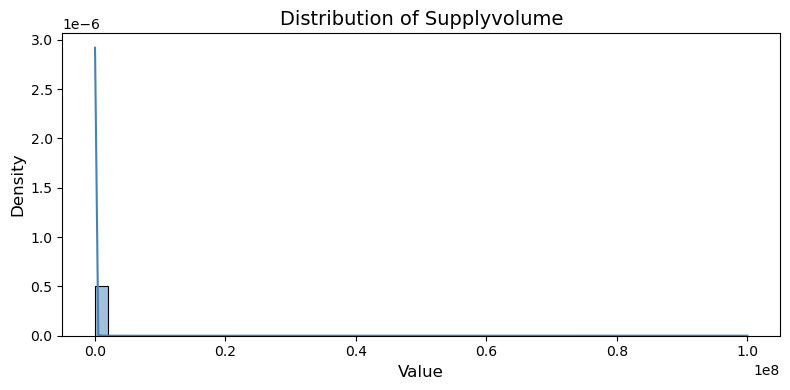

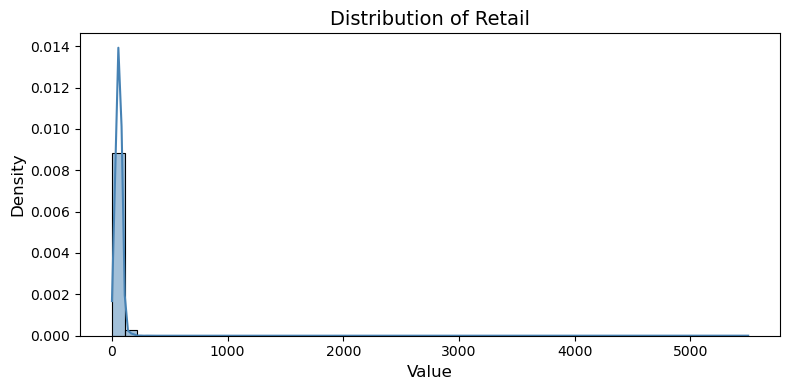

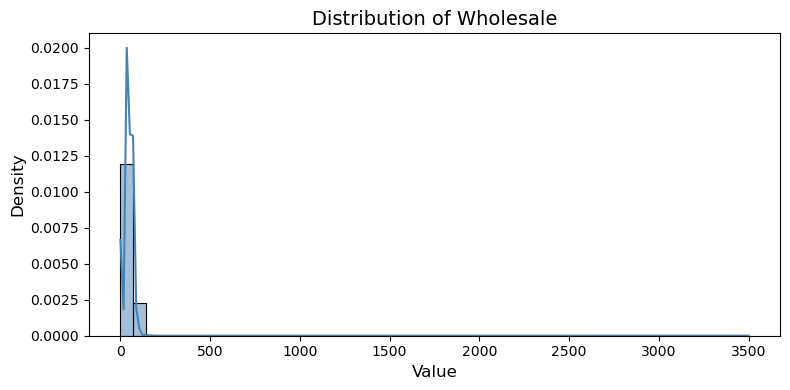

In [122]:
# Select all numeric columns
numeric_columns = df1[["supplyvolume", "retail", "wholesale"]]

# Plot distributions
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col].fillna(0), bins=50, kde=True, stat="density", color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()




In [123]:
numeric_columns.fillna(numeric_columns.median())
df1[numeric_columns.columns] = numeric_columns


In [124]:
df1.isnull().sum()

commodity_classification       0
commodity                      0
classification                 0
county                         0
market                         0
date                           0
year                           0
month                          0
year_month                     0
weekofyear                     0
year_week                      0
supplyvolume                4227
retail                       859
wholesale                   1577
unit                           0
dtype: int64

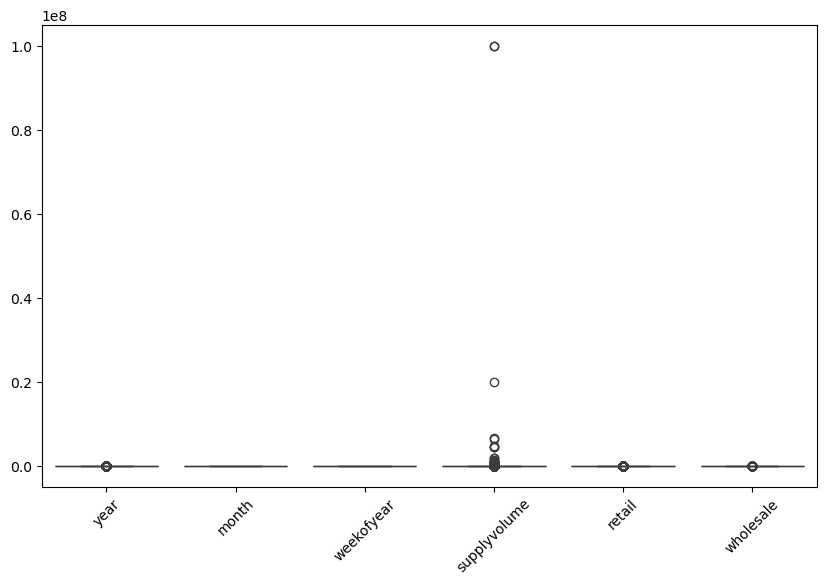

In [125]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.show()

In [126]:
Q1 = df1['supplyvolume'].quantile(0.25)
Q3 = df1['supplyvolume'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df1['supplyvolume'] = np.where(df1['supplyvolume'] < lower, lower,
                        np.where(df1['supplyvolume'] > upper, upper, df1['supplyvolume']))

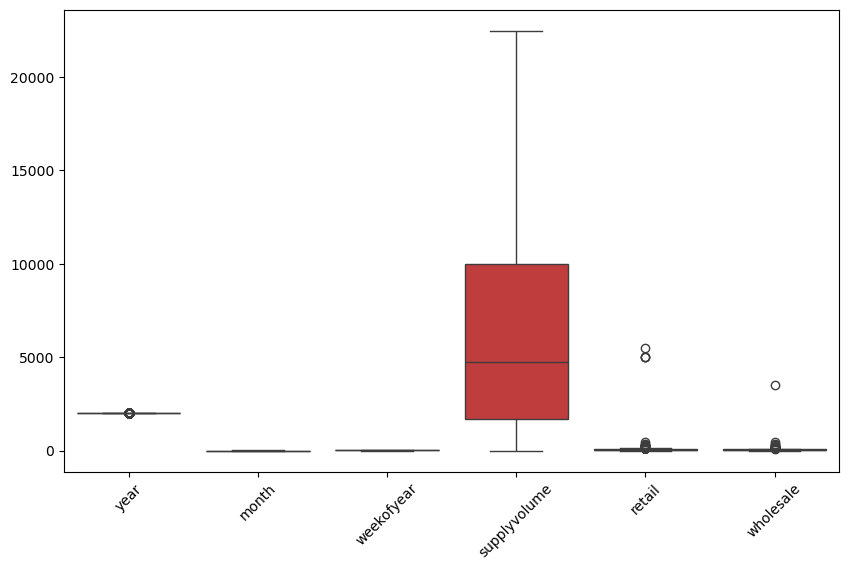

In [127]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.show()

In [128]:
df.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear'],
      dtype='object')

## **Feature Engineering**

### **Feature Engineering AgriBora dataset**

**1. Convert Date & Create Basic Temporal Features**

In [129]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Basic time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear

**2. Create Seasonal Cyclical Features (for ML models)**

**What are Seasonal Cyclical Features?**

Some features repeat in cycles:

- Weeks in a year (1–52)

- Months in a year (1–12)

- Hours in a day (for hourly data)

These are cyclical, meaning after the last value the cycle restarts:

- Week 52 → Week 1

- December → January

- Hour 23 → Hour 0

We encode these as sine and cosine functions to preserve the cyclical relationship.

In [130]:
df['week_sin'] = np.sin(2 * np.pi * df['weekofyear'] / 52)
df['week_cos'] = np.cos(2 * np.pi * df['weekofyear'] / 52)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


**3. Lag Features**

These help the model understand past price behavior.

- A lag is simply the value of a variable from previous time periods.

- It shifts the column DOWN so that each row can “see” what the price was previously.



In [132]:
df = df.sort_values(['county', 'date'])

df['wholesale_lag_1'] = df.groupby('county')['wholesale'].shift(1)
df['wholesale_lag_2'] = df.groupby('county')['wholesale'].shift(2)
df['wholesale_lag_3'] = df.groupby('county')['wholesale'].shift(3)
df['wholesale_lag_4'] = df.groupby('county')['wholesale'].shift(4)
df['wholesale_lag_8'] = df.groupby('county')['wholesale'].shift(8)


**4. Rolling Averages (trend signals)**

A rolling average is the mean of a variable over a fixed number of previous periods (e.g., weeks).

Purpose

 - Smooth out short-term fluctuations (noise) in prices

 - Capture trends over time

 - Provide the model with information about recent average price behavior

 

In [133]:
df['wholesale_ma_3'] = df.groupby('county')['wholesale'].rolling(3).mean().reset_index(0, drop=True)
df['wholesale_ma_6'] = df.groupby('county')['wholesale'].rolling(6).mean().reset_index(0, drop=True)
df['wholesale_ma_12'] = df.groupby('county')['wholesale'].rolling(12).mean().reset_index(0, drop=True)


**5. Rolling Volatility (price stability)**

- Rolling volatility measures how variable prices are over recent periods.

- High volatility → price fluctuates a lot

- Low volatility → price stable

- This is very useful because markets react differently to stable vs volatile prices.

In [134]:
df['wholesale_std_3'] = df.groupby('county')['wholesale'].rolling(3).std().reset_index(0, drop=True)
df['wholesale_std_6'] = df.groupby('county')['wholesale'].rolling(6).std().reset_index(0, drop=True)


In [135]:
df.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear', 'year', 'month', 'quarter', 'day_of_year', 'week_sin',
       'week_cos', 'month_sin', 'month_cos', 'wholesale_lag_1',
       'wholesale_lag_2', 'wholesale_lag_3', 'wholesale_lag_4',
       'wholesale_lag_8', 'wholesale_ma_3', 'wholesale_ma_6',
       'wholesale_ma_12', 'wholesale_std_3', 'wholesale_std_6'],
      dtype='object')